In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from nltk.tokenize import word_tokenize
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout


In [ ]:

train_data=pd.read_csv('/content/NLP_train.csv', encoding='latin-1')
test_data=pd.read_csv('/content/NLP_test.csv', encoding='latin-1')

In [ ]:

df = pd.read_csv('/content/NLP_train.csv',encoding='latin-1')
df1 = pd.read_csv('/content/NLP_test.csv',encoding='latin-1')


In [ ]:
print(df.head())

   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative  


In [ ]:
print(df1.head())

   UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                       OriginalTweet           Sentiment  
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1  When I couldn't find hand sanitizer at Fred Me...            Positive  
2  Find out how you can protect yourself and love...  Extremely Positive  
3  #Panic buying hits #NewYork City as anxious sh...            Negative  
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB
None


In [ ]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB
None


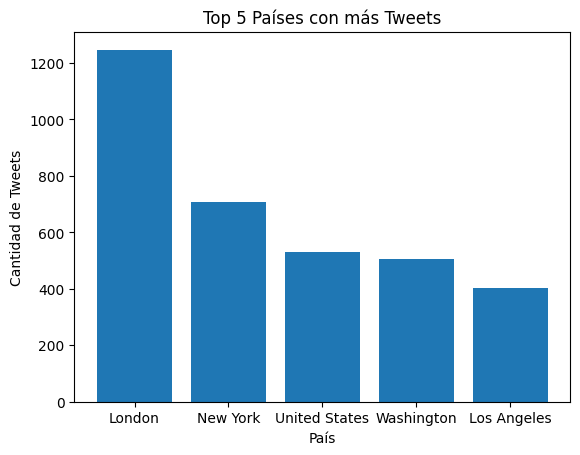

In [ ]:


paises = df["Location"].str.split(",").str[0]
paises_agrupados = df.groupby(paises)

cantidad_tweets = paises_agrupados.size()

paises_ordenados = cantidad_tweets.sort_values(ascending=False)

top_5_paises = paises_ordenados.index[:5]

plt.bar(top_5_paises, cantidad_tweets[top_5_paises])
plt.xlabel("País")
plt.ylabel("Cantidad de Tweets")
plt.title("Top 5 Países con más Tweets")
plt.show()

In [ ]:

df = df.drop(["UserName", "ScreenName", "Location", "TweetAt"], axis=1)

In [ ]:
sentiment_mapping = {
    'Neutral': 'neutral',
    'Positive': 'positivo',
    'Negative': 'negativo',
    'Extremely Negative': 'extremadamente negativo',
    'Extremely Positive': 'extremadamente positivo'
}

df['SentimentCategory'] = df['Sentiment'].map(sentiment_mapping)

print(df.head())

                                       OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

         SentimentCategory  
0                  neutral  
1                 positivo  
2                 positivo  
3                 positivo  
4  extremadamente negativo  


In [ ]:
import string
import re
import nltk

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def limpiar_tweets(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    # remove links starting with http
    text = re.sub(r'http\S+', ' ', text)
    # remove digits
    text = re.sub(r'\d+', ' ', text)
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


df['CleanedTweets'] = df['OriginalTweet'].apply(limpiar_tweets)

X = df['CleanedTweets']
y = df['SentimentCategory']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

y_onehot = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (32925,)
X_test shape: (8232,)
y_train shape: (32925, 5)
y_test shape: (8232, 5)


In [ ]:
vocab_size=5000
embedding_dim=64
max_length=12#la edad que tienes :-)
trunc_type='post'
padding_type='post'
oov_tok='<OOV>'

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)


tokenizer.fit_on_texts(X_train)


X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)


X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print("X_train_padded shape:", X_train_padded.shape)
print("X_test_padded shape:", X_test_padded.shape)


X_train_padded shape: (32925, 12)
X_test_padded shape: (8232, 12)


In [ ]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

In [ ]:
import numpy as np

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)


tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


X_train_padded = np.array(X_train_padded)
X_test_padded = np.array(X_test_padded)


print("Antes del Padding:")
print("X_train shape:", len(X_train_sequences))  # Displaying length instead of shape
print("X_test shape:", len(X_test_sequences))    # Displaying length instead of shape

print("\nDespués del Padding:")
print("X_train_padded shape:", X_train_padded.shape)
print("X_test_padded shape:", X_test_padded.shape)

Antes del Padding:
X_train shape: 32925
X_test shape: 8232

Después del Padding:
X_train_padded shape: (32925, 12)
X_test_padded shape: (8232, 12)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping



model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))

model.add(LSTM(units=64, return_sequences=True))  # Puedes ajustar la cantidad de unidades según sea necesario

model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 12, 64)            320000    
                                                                 
 lstm_3 (LSTM)               (None, 12, 64)            33024     
                                                                 
 dense_6 (Dense)             (None, 12, 32)            2080      
                                                                 
 dense_7 (Dense)             (None, 12, 3)             99        
                                                                 
Total params: 355203 (1.35 MB)
Trainable params: 355203 (1.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)


early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

history = model.fit(
    X_train_padded, y_train_onehot,
    batch_size=32,
    epochs=50,
    validation_data=(X_test_padded, y_test_onehot),
    callbacks=[early_stopping]
)


Epoch 1/50


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 5, 3) and (None, 12, 3) are incompatible


In [ ]:

print('Test loss:', score[0])
print('Test accuracy:', score[1])